In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [60]:
df = pd.read_csv('credit.csv', index_col = 0)
df = df[df['Limit'] > 3500]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


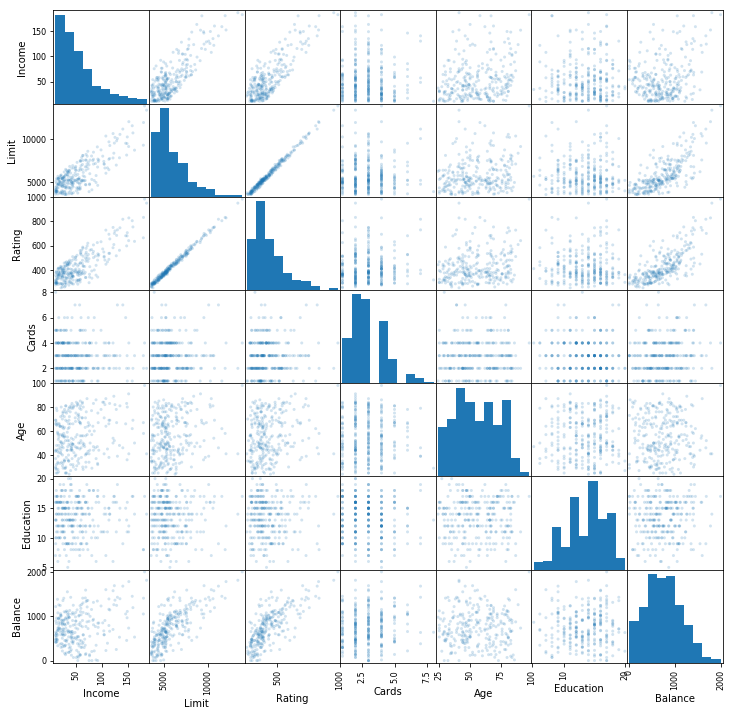

In [61]:
# predict Balance
scatter_matrix(df, alpha=0.2, figsize =(12,12))
None

In [11]:
y = df.Balance
X = df.Limit

In [12]:
model = sm.OLS(y, X).fit()
model.params

Limit    0.121655
dtype: float64

In [ ]:
# Limit above is the slope
# As limit increase by 1 unit, balance moves by .12

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     2317.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          2.98e-168
Time:                        11:45:04   Log-Likelihood:                -2800.9
No. Observations:                 400   AIC:                             5604.
Df Residuals:                     399   BIC:                             5608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Limit          0.1217      0.003     48.131      0.000       0.117       0.127
==============================================================================
Omnibus:                       25.956   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.386
Skew:                           0.659   Prob(JB):                     4.16e-07
Kurtosis:                       3.166   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# add a y-intercept to see if we can improve the scores

In [62]:
y = df.Balance
X = df.Limit
X = sm.add_constant(X)
X.head(3)

,const,Limit
1,1.0,3606
2,1.0,6645
3,1.0,7075


In [63]:
y = df['Balance']
X = df['Limit']
X = sm.add_constant(X)
X.head(3)

,const,Limit
1,1.0,3606
2,1.0,6645
3,1.0,7075


In [64]:
model = sm.OLS(y, X).fit()
model.params

const   -162.224178
Limit      0.153832
dtype: float64

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     317.0
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           3.57e-47
Time:                        13:29:54   Log-Likelihood:                -1870.2
No. Observations:                 267   AIC:                             3744.
Df Residuals:                     265   BIC:                             3752.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -162.2242     53.557     -3.029      0.003    -267.675     -56.773
Limit          0.1538      0.009     17.803      0.000       0.137       0.171
==============================================================================
Omnibus:                        2.269   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.940
Skew:                           0.168   Prob(JB):                        0.379
Kurtosis:                       3.247   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# add Rating in addition to Limit
y = df['Balance']
X = df[['Limit', 'Rating']]

# Could also do like this:
# X = df['Limit']
# X['Rating'] = df['Rating']

# X = sm.add_constant(X)
X.head(3)

,Limit,Rating
1,3606,283
2,6645,483
3,7075,514


In [67]:
model = sm.OLS(y, X).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.63e-131
Time:                        13:30:05   Log-Likelihood:                -1874.4
No. Observations:                 267   AIC:                             3753.
Df Residuals:                     265   BIC:                             3760.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Limit          0.1843      0.074      2.492      0.013       0.039       0.330
Rating        -0.7619      1.016     -0.750      0.454      -2.763       1.239
==============================================================================
Omnibus:                        1.213   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.071
Skew:                           0.154   Prob(JB):                        0.585
Kurtosis:                       3.036   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# add Rating in addition to Limit
y = df['Balance']
X = df[['Limit', 'Rating', 'Income']]

# Could also do like this:
# X = df['Limit']
# X['Rating'] = df['Rating']

# X = sm.add_constant(X)
X.head(3)

,Limit,Rating,Income
1,3606,283,14.891
2,6645,483,106.025
3,7075,514,104.593


In [50]:
model = sm.OLS(y, X).fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          5.95e-211
Time:                        13:17:24   Log-Likelihood:                -2693.9
No. Observations:                 400   AIC:                             5394.
Df Residuals:                     397   BIC:                             5406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Limit          0.5905      0.038     15.646      0.000       0.516       0.665
Rating        -5.4677      0.499    -10.966      0.000      -6.448      -4.487
Income        -6.7320      0.469    -14.361      0.000      -7.654      -5.810
==============================================================================
Omnibus:                       59.979   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.220
Skew:                           0.982   Prob(JB):                     1.15e-19
Kurtosis:                       4.171   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 57.5+ KB


In [52]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


In [57]:
df[df['Balance'] < 10]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
12,15.045,1311,138,3,64,16,Male,No,No,Caucasian,0
16,20.089,2525,200,3,57,15,Female,No,Yes,African American,0
17,53.598,3714,286,3,73,17,Female,No,Yes,African American,0
23,20.103,2631,213,3,61,10,Male,No,Yes,African American,0
25,10.742,1757,156,3,57,15,Female,No,No,Caucasian,0
32,28.941,2733,210,5,43,16,Male,No,Yes,Asian,0
34,31.367,1829,162,4,30,10,Male,No,Yes,Caucasian,0
35,20.150,2646,199,2,25,14,Female,No,Yes,Asian,0
49,44.522,2252,205,6,72,15,Male,No,Yes,Asian,0
55,15.333,1499,138,2,47,9,Female,No,Yes,Asian,0


In [59]:
df2 = df[df['Limit'] < 3500]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [69]:
df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [70]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [85]:
df_with_dummies = pd.get_dummies(df, columns=["Gender", "Married", "Ethnicity", "Student"]).head()

In [86]:
df_with_dummies.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Student_No,Student_Yes
1,14.891,3606,283,2,34,11,333,1,0,0,1,0,0,1,1,0
2,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,0,1
3,104.593,7075,514,4,71,11,580,1,0,1,0,0,1,0,1,0
4,148.924,9504,681,3,36,11,964,0,1,1,0,0,1,0,1,0
5,55.882,4897,357,2,68,16,331,1,0,0,1,0,0,1,1,0


In [89]:
# need to drop columns that can be derived from other columns 
df_with_dummies.drop(['Student_No', 'Gender_Female', 'Married_No', 'Ethnicity_African American', 'Ethnicity_Asian'], axis=1)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Married_Yes,Ethnicity_Caucasian,Student_Yes
1,14.891,3606,283,2,34,11,333,1,1,1,0
2,106.025,6645,483,3,82,15,903,0,1,0,1
3,104.593,7075,514,4,71,11,580,1,0,0,0
4,148.924,9504,681,3,36,11,964,0,0,0,0
5,55.882,4897,357,2,68,16,331,1,1,1,0


C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


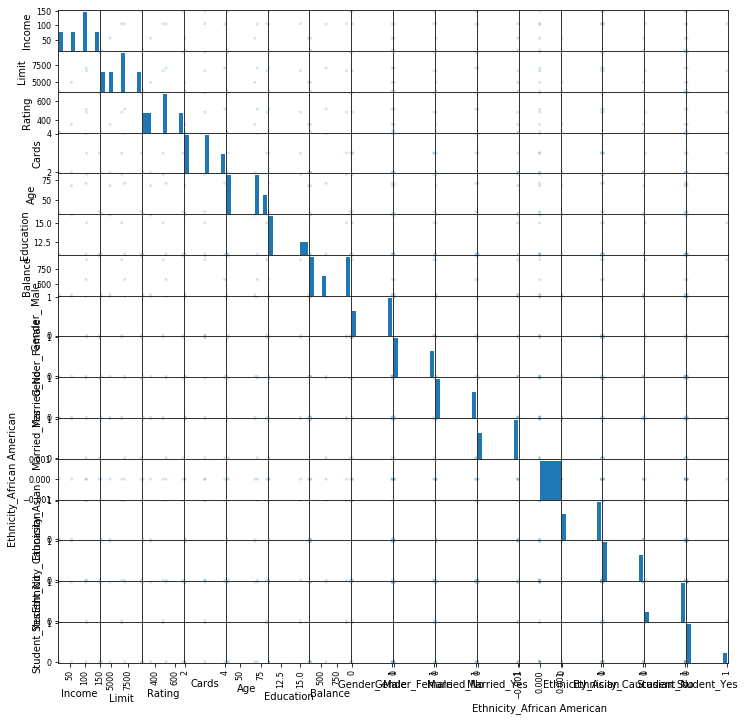

In [97]:
scatter_matrix(df_with_dummies, alpha=0.2, figsize =(12,12))
None

In [96]:
# add Rating in addition to Limit
y = df_with_dummies['Balance']
X = df_with_dummies[['Limit', 'Rating', 'Income', 'Student_Yes', 'Married_Yes']]

# X = sm.add_constant(X)
# X.head(3)

model = sm.OLS(y, X).fit()
model.params
model.summary()

C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
C:\Users\ei4egod\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\ei4egod\AppDat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 10 Jan 2018   Prob (F-statistic):                nan
Time:                        14:07:35   Log-Likelihood:                 108.99
No. Observations:                   5   AIC:                            -208.0
Df Residuals:                       0   BIC:                            -209.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Limit          10.6309        inf          0        nan         nan         nan
Rating       -121.8059        inf         -0        nan         nan         nan
Income       -114.9727        inf         -0        nan         nan         nan
Student_Yes  3101.8179        inf          0        nan         nan         nan
Married_Yes -1818.8755        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.077
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.268
Skew:                           0.359   Prob(JB):                        0.875
Kurtosis:                       2.121   Cond. No.                     3.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
df = pd.read_csv('credit.csv', index_col=0)
df = df[df.Limit > 3500]
df['Student'] = df.Student.map({'No':0, 'Yes':1})
df['Married'] = df.Married.map({'No':0, 'Yes':1})
df['Ethnicity'] = df.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
df['Female'] = pd.get_dummies(df.Gender)['Female']
df.drop(['Gender'], axis=1, inplace=True)
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0


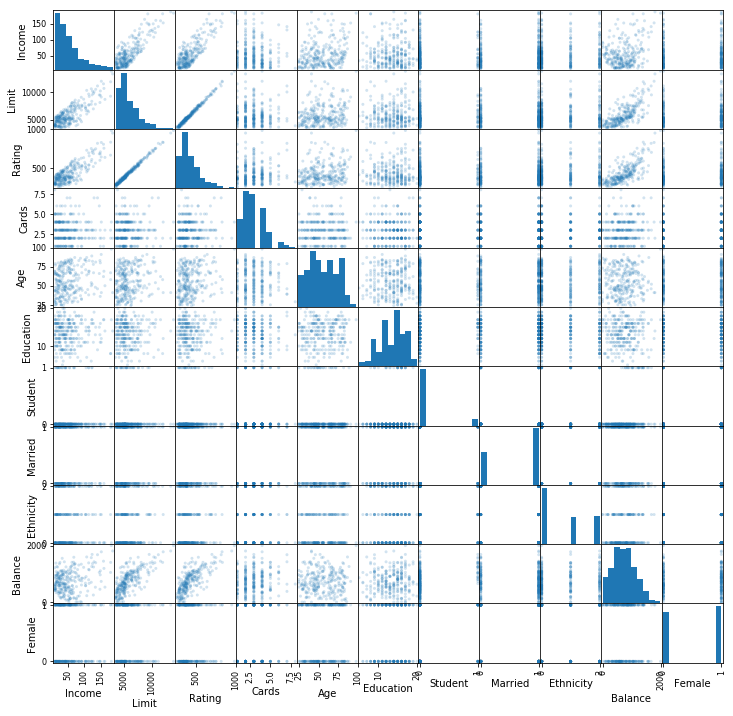

In [99]:
scatter_matrix(df, alpha=0.2, figsize =(12,12))
None

In [105]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0
4,148.924,9504,681,3,36,11,0,0,1,964,1
5,55.882,4897,357,2,68,16,0,1,0,331,0


In [103]:
y = df.Balance
X = pd.DataFrame(df, columns=['Rating', 'Income', 'Limit'])

In [104]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1321.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.31e-158
Time:                        14:12:57   Log-Likelihood:                -1807.6
No. Observations:                 267   AIC:                             3621.
Df Residuals:                     264   BIC:                             3632.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating        -4.5399      0.844     -5.381      0.000      -6.201      -2.879
Income        -6.9951      0.534    -13.093      0.000      -8.047      -5.943
Limit          0.5293      0.063      8.345      0.000       0.404       0.654
==============================================================================
Omnibus:                       44.092   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.097
Skew:                           1.075   Prob(JB):                     5.41e-14
Kurtosis:                       3.934   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
y = df.Balance
X = pd.DataFrame(df, columns=['Rating', 'Income', 'Student', 'Limit'])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1913.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          4.88e-193
Time:                        14:29:47   Log-Likelihood:                -1723.4
No. Observations:                 267   AIC:                             3455.
Df Residuals:                     263   BIC:                             3469.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating        -5.8855      0.623     -9.449      0.000      -7.112      -4.659
Income        -7.1395      0.391    -18.281      0.000      -7.908      -6.371
Student      472.2653     31.050     15.210      0.000     411.127     533.403
Limit          0.6212      0.047     13.289      0.000       0.529       0.713
==============================================================================
Omnibus:                       10.873   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.019
Skew:                           0.475   Prob(JB):                      0.00405
Kurtosis:                       3.299   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""